# Bond valuations

## Time Value of Money

In [3]:
pip install numpy-financial

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import numpy_financial package using the alias npf
import numpy_financial as npf

*pmt* and *pv* = -ve if we are investing (money going from out savings account) cahflow out | sign = direction of cashflow <br/>
*nper* multiply 12 if compounded monthly <br/>
*rate* divide by 12 if compounded monthly <br/>

**Calculate the future value of an investment of USD 10,000 with top-ups of USD 5,000 each year for 30 years earning 5% annual interest and assign the result to savings**

In [7]:
# Calculate the future value of an investment
savings = npf.fv(rate=0.05, nper=30, pmt=-5000, pv=-10000)

# Print the result
print(savings)

375413.6612665734


**How long will it take you to save USD 30,000 if you save USD 1,250 per quarter invested in a fund that offers 4.5% annual returns compounded quarterly?**

In [9]:
# Calculate how long it will take to reach the savings goal
number_periods = npf.nper(fv=30000,rate=0.045/4,pv=0,pmt=-1250)

# Print the result
print(number_periods)

21.365232331911212


**To pay off a mortgage of USD 275,000 in ten years with an annual interest rate of 3.5% compounded monthly, you needed to pay USD 2,719 per month. How much in 20 years?**

In [11]:
# Calculate monthly payment required
required_payment = npf.pmt(pv=275000, fv = 0, nper = 20*12, rate = 0.035/12)

# Print the result
print(required_payment)

-1594.8892244535023


payments dropped only by around 40% instead of by half, this is because the relationship isn't linear

**Find how much a USD 100 per month investment at a 3% annual rate compounded monthly grows to after 5 years.**

In [14]:
# Calculate how much USD 100 per month compounding at 3% grows to after 5 years
total_savings = npf.fv(rate=0.03/12, nper=5*12, pmt=-100, pv=0)
print(total_savings)

6464.67126221082


**Find the time to save USD 15,000 starting with USD 5,000 and adding USD 250 per month at 5% interest compounded monthly.**

In [16]:
# Calculate the time to reach a USD 15,000 deposit on a house
time_to_goal = npf.nper(rate=0.05/12, pmt=-250, pv=-5000, fv=15000)
print(time_to_goal)

34.41570331103298


**You are 22 years old and want to retire at 65 with USD 1 million in the bank. If you can grow your money at 5% per year, how much should you invest per month?**

In [18]:
# Calculate the monthly contributions needed to retire with USD 1,000,000
monthly_contributions = npf.pmt(rate=0.05/12, nper=(65-22)*12, pv=0, fv=1000000)
print(monthly_contributions)

-552.1252103174048


## Bond Prices & Yields

#### Present value & zero coupon bonds

In [21]:
# Calculate the upfront investment at 3% interest
pv_three_percent = -npf.pv(pmt = -100, fv = 11000, nper = 7*12, rate = 0.03/12)

# Print the result
print("3% Annual Interest: ", pv_three_percent)

3% Annual Interest:  1350.6316084299328


In [22]:
# Calculate the upfront investment at 5% interest
pv_five_percent = -npf.pv(pmt = -100, fv = 11000, nper = 7*12, rate = 0.05/12)

# Print the result
print("5% Annual Interest: ", pv_five_percent)

5% Annual Interest:  682.0240889199054


Notice that increasing the interest rate from 3% to 5% reduced amount you needed to invest upfront to achieve your goal by a third. This is a good illustration of how powerful compounding over time can be!

In [24]:
# Calculate price of a 3 year 5% yield zero coupon bond
price_1 = 100/(1+0.05)**3

# Print the result
print("3 year 5% yield ZCB: ", price_1)

3 year 5% yield ZCB:  86.3837598531476


In [25]:
# Calculate price of a 10 year 5% yield zero coupon bond
price_2 = 100/(1+0.05)**10

# Print the result
print("10 year 5% yield ZCB: ", price_2)

10 year 5% yield ZCB:  61.39132535407592


In [26]:
# Calculate price of a 3 year 7% yield zero coupon bond
price_3 = 100/(1+0.07)**3

# Print the result
print("3 year 7% yield ZCB: ", price_3)

3 year 7% yield ZCB:  81.62978768908519


Increasing either the time to maturity or yield means we are applying more discounting to the single cash-flow (face value), giving it a lower PV and hence a lower price for the zero coupon bond.

#### Coupon paying bonds

In [29]:
# Find the price of a 10 year bond with 3% coupon and 4% yield
bond_yield_4 = -npf.pv(rate=0.04, nper=10, pmt=3, fv=100)

# Print the result
print("4% Yield Price: ", bond_yield_4)

4% Yield Price:  91.88910422064497


In [30]:
# Find the price of a 10 year bond with 3% coupon and 3% yield
bond_yield_3 = -npf.pv(rate=0.03, nper=10, pmt=3, fv=100)

# Print the result
print("3% Yield Price: ", bond_yield_3)

3% Yield Price:  100.0


In [31]:
# Find the price of a 10 year bond with 3% coupon and 5% yield
bond_yield_5 = -npf.pv(rate=0.05, nper=10, pmt=3, fv=100)

# Print the result
print("5% Yield Price: ", bond_yield_5)

5% Yield Price:  84.55653014163036


**when interest rates are higher**, we discount the cash-flows of a bond at a higher rate, meaning their **PV will be lower**. As a bond is just the sum of the PV of each cash-flow, this means the **bond price will be lower when interest rates are higher**, and vice versa.

In [33]:
# Find the price of a 10 year bond with 2% coupon and 4% yield
bond_coupon_2 = -npf.pv(rate=0.04, nper=10, pmt=2, fv=100)

# Print the result
print("2% Coupon Price: ", bond_coupon_2)

2% Coupon Price:  83.77820844128993


In [34]:
# Find the price of a 10 year bond with 5% coupon and 4% yield
bond_coupon_5 = -npf.pv(rate=0.04, nper=10, pmt=5, fv=100)

# Print the result
print("5% Coupon Price: ", bond_coupon_5)

5% Coupon Price:  108.11089577935503


In [35]:
# Find the price of a 10 year bond with 10% coupon and 4% yield
bond_coupon_10 = -npf.pv(rate=0.04, nper=10, pmt=10, fv=100)

# Print the result
print("10% Coupon Price: ", bond_coupon_10)

10% Coupon Price:  148.6653746761302


**a higher coupon makes the bond more valuable makes sense**; if the bond pays you more money, it must be worth more!

#### Plotting bond prices against yields

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

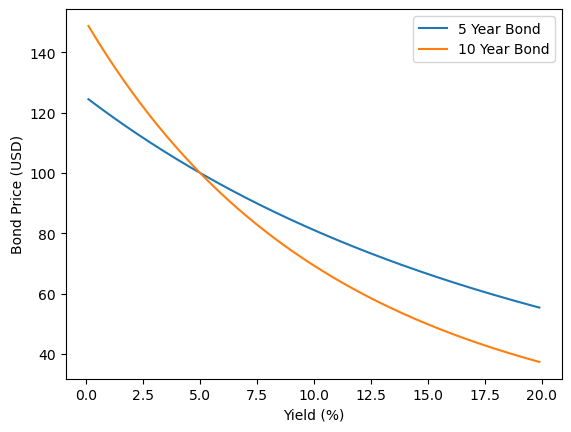

In [39]:
# Create an array of bond yields and convert to DataFrame
bond_yields = np.arange(0.1, 20, 0.1)
bond = pd.DataFrame(bond_yields, columns=['bond_yield'])

# Add columns for different bonds
bond['bond_price_5Y'] = -npf.pv(rate=bond['bond_yield'] / 100, nper=5, pmt=5, fv=100)
bond['bond_price_10Y'] = -npf.pv(rate=bond['bond_yield'] / 100, nper=10, pmt=5, fv=100)

# Plot graph of bonds
plt.plot(bond['bond_yield'], bond['bond_price_5Y'], label='5 Year Bond')
plt.plot(bond['bond_yield'], bond['bond_price_10Y'], label='10 Year Bond')
plt.xlabel('Yield (%)')
plt.ylabel('Bond Price (USD)')
plt.legend()
plt.show()

bond with the higher maturity is much more sensitive to changes in yield. 

### YTM

**Find the yield of a 5 year zero coupon bond with a face value of USD 100 and price of USD 84.67.**

In [43]:
# Find the first zero coupon bond yield
bond_1 = (100 / 84.67) ** (1 / 5) - 1

# Print the result
print("ZCB Price USD 84.67: ", bond_1)

ZCB Price USD 84.67:  0.033841801397449967


**Find the yield of a 5 year zero coupon bond with a face value of USD 100 and price of USD 78.22**

In [45]:
# Find the second zero coupon bond yield
bond_2 = (100/78.22)**(1/5)-1

# Print the result
print("ZCB Price USD 78.22: ", bond_2)

ZCB Price USD 78.22:  0.050355799389712574


**Find the yield of a three-year bond paying a 3% annual coupon with a price of USD 92.**

In [47]:
# Bond with price of USD 92 paying 3% coupon for 3 years
bond_a = npf.rate(pv=-92, fv = 100, pmt = 3, nper = 3 )
print("Bond A: ", bond_a)

Bond A:  0.059924610559293524


**Find the yield of a five-year bond paying a 6% annual coupon with a price of USD 102.**

In [49]:
# Bond with price of USD 102 paying 6% coupon for 5 years
bond_b = npf.rate(nper=5, pmt=6, pv=-102, fv=100)
print("Bond B: ", bond_b)

Bond B:  0.05531245757227904


**Find the yield of a five-year bond paying a 3% annual coupon with a price of USD 95.**

In [51]:
# Bond with price of USD 95 paying 3% coupon for 5 years
bond_c = npf.rate(nper=5, pmt=3, pv=-95, fv=100)
print("Bond C: ", bond_c)

Bond C:  0.041271503993442205


## Duration
**Duration = % price change for 1% interest rate change** <br/>
**Duration d.p. to maturity (years), i.p. to coupon rate (%) and ytm (%)**

**Find the duration of a 10 year zero coupon bond with a 3% yield, then print the result.**

In [54]:
# Find the price of the zero coupon bond at current yield levels
price = -npf.pv(rate=0.03, nper=10, pmt=0, fv=100)

# Find the price of the zero coupon bond at 1% higher yield levels
price_up = -npf.pv(rate=0.04, nper=10, pmt=0, fv=100)

# Find the price of the zero coupon bond at 1% lower yield levels
price_down = -npf.pv(rate=0.02, nper=10, pmt=0, fv=100)

# Calculate duration using the formula and print result
duration = (price_down - price_up) / (2 * price * 0.01)
print("Zero Coupon Bond Duration: ", duration)

Zero Coupon Bond Duration:  9.728888259316797


In [55]:
# Find the price of the coupon bond at current yield levels
price = -npf.pv(rate=0.03, nper=10, pmt=3, fv=100)

# Find the price of the coupon bond at 1% higher yield levels
price_up = -npf.pv(rate=0.04, nper=10, pmt=3, fv=100)

# Find the price of the coupon bond at 1% lower yield levels
price_down = -npf.pv(rate=0.02, nper=10, pmt=3, fv=100)

# Calculate duration using the formula
duration = (price_down-price_up) / (2*price*0.01)

# Print the result
print("Coupon Paying Bond Duration: ", duration)

Coupon Paying Bond Duration:  8.54674039279864


Notice that the addition of coupons changed the duration of the bond from 9.73% in the previous exercise to 8.55% here, meaning that coupon bonds are less sensitive to interest rates than their zero coupon equivalents.

### Comparing the duration of two bonds directly

In [58]:
# Find & print duration of 10 year bond with 3% coupon & 5% yield
price_10y = -npf.pv(rate=0.05, nper=10, pmt=3, fv=100)
price_up_10y = -npf.pv(rate=0.06, nper=10, pmt=3, fv=100)
price_down_10y = -npf.pv(rate=0.04, nper=10, pmt=3, fv=100)
duration_10y = (price_down_10y - price_up_10y) / (2 * price_10y * 0.01)
print("10 Year Bond: ", duration_10y)

10 Year Bond:  8.260370518687731


In [59]:
# Find & print duration of 20 year bond with 3% coupon & 5% yield
price_20y = -npf.pv(rate=0.05, nper=20, pmt=3, fv=100)
price_up_20y = -npf.pv(rate=0.06, nper=20, pmt=3, fv=100)
price_down_20y = -npf.pv(rate=0.04, nper=20, pmt=3, fv=100)
duration_20y = (price_down_20y - price_up_20y) / (2 * price_20y * 0.01)
print("20 Year Bond: ", duration_20y)

20 Year Bond:  13.865652120642753


 20 year bond has a higher duration than the 10 year bond

**longer maturtiy = wait longer = more exposed to interest rate risk = high duration**

### Using the steepness of the price/yield line

In [63]:
# Create an array of bond yields
bond_yields = np.arange(0.1, 20, 0.1) # cant add 0 bcoz of divide by 0 error

# Convert this array into a pandas DataFrame and add column title
bond = pd.DataFrame(bond_yields, columns=['bond_yield'])
bond.head()

,bond_yield
0,0.1
1,0.2
2,0.3
3,0.4
4,0.5


In [64]:
# Add bond price column with price varying according to the yield
bond['bond_price'] = -npf.pv(rate=bond['bond_yield'] / 100, nper=20, pmt=5, fv=100)

In [65]:
bond.head()

,bond_yield,bond_price
0,0.1,196.978503
1,0.2,194.013231
2,0.3,191.103034
3,0.4,188.246786
4,0.5,185.443386


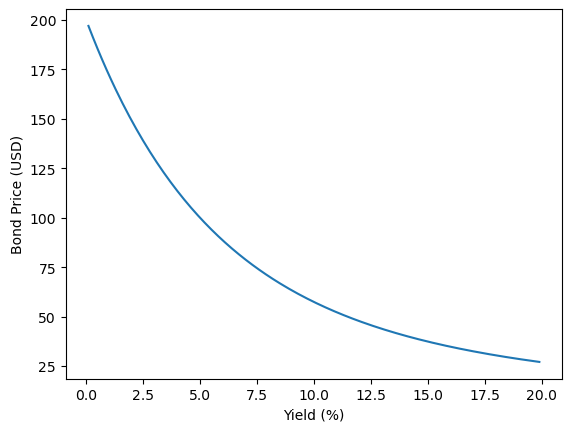

In [66]:
# Plot graph of bond yields against prices, add x-axis and y-axis labels, show plot
plt.plot(bond['bond_yield'], bond['bond_price'])
plt.xlabel('Yield (%)')
plt.ylabel('Bond Price (USD)')
plt.show()

By using the slope of the price/yield graph, we can see that low yielding bonds are more sensitive to changes in interest rates than the same bond with a higher yield.

### Plotting duration vs. the factor

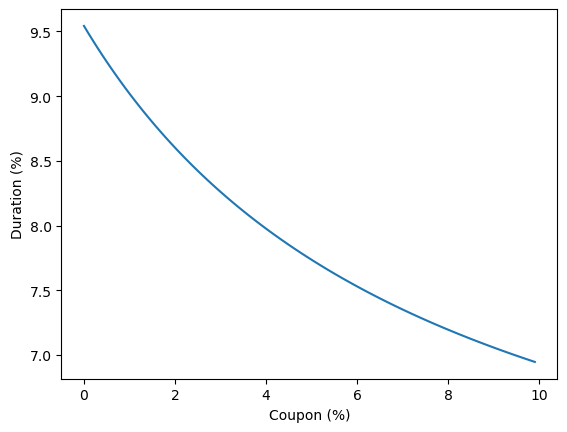

In [69]:
# Create array of coupon rates and assign to pandas DataFrame
bond_coupon = np.arange(0, 10, 0.1)
bond = pd.DataFrame(bond_coupon, columns=['bond_coupon'])

# Calculate bond price, price_up, price_down, and duration
bond['price'] = -npf.pv(rate=0.05, nper=10, pmt=bond['bond_coupon'], fv=100)
bond['price_up'] = -npf.pv(rate=0.05 + 0.01, nper=10, pmt=bond['bond_coupon'], fv=100)
bond['price_down'] = -npf.pv(rate=0.05 - 0.01, nper=10, pmt=bond['bond_coupon'], fv=100)
bond['duration'] = (bond['price_down'] - bond['price_up']) / (2 * bond['price'] * 0.01)

# Plot coupon vs. duration, add labels & title, show plot
plt.plot(bond['bond_coupon'], bond['duration'])
plt.xlabel('Coupon (%)')
plt.ylabel('Duration (%)')
plt.show()

increasing the coupon rate decreases the duration of a bond.

### Dollar duration

**Find the dollar duration and DV01 of a bond. The bond has a 30 year maturity, coupon rate of 3.5%, yield to maturity of 5%, and face value of USD 100.**

In [73]:
# Find the duration of the bond
price = -npf.pv(rate=0.05, nper=30, pmt=3.5, fv=100)
price_up = -npf.pv(rate=0.06, nper=30, pmt=3.5, fv=100)
price_down = -npf.pv(rate=0.04, nper=30, pmt=3.5, fv=100)
duration = (price_down - price_up) / (2 * price * 0.01)

# Find the dollar duration of the bond
dollar_duration = duration * price * 0.01
print("Dollar Duration: ", dollar_duration)

# Find the DV01 of the bond
dv01 = duration * price * 0.0001
print("DV01: ", dv01)

Dollar Duration:  12.88303061419567
DV01:  0.1288303061419567


If you already have the dollar duration, you could also find the DV01 by simply multiplying the dollar duration by 1% since a basis point is 1% of 1%.

### Hedging

Say you own a portfolio of bonds whose combined DV01 is USD 5,000. You decide to hedge this portfolio by selling a fixed amount of the 30 year bond from the previous exercise, which has a price of USD 76.94 and a DV01 of 12.88 cents.

In [77]:
# Assign DV01 of portfolio and bond to variables
portfolio_dv01 = 5000
bond_dv01 = 0.1288
bond_price = 76.94

# Calculate quantity of bond to hedge portfolio
hedge_quantity = portfolio_dv01 / bond_dv01
print("Number of bonds to sell: ", hedge_quantity)

# Calculate dollar amount of bond to hedge portfolio
hedge_amount = hedge_quantity * bond_price
print("Dollar amount to sell: USD", hedge_amount)

Number of bonds to sell:  38819.875776397515
Dollar amount to sell: USD 2986801.2422360247


On a bond trading desk, traders will often refer to the size of their positions by their DV01 instead of the number or dollar amounts of bonds they have, e.g., I'm long USD 20k of DV01.

### Predicting price impacts from duration

The bond has a maturity of 5 years, coupon of 7%, yield of 4%, and face value of USD 100. It has a price of USD 113.36 and dollar duration of USD 4.83. Predict the price change for a 2% decrease in interest rates.

In [81]:
# Assign bond price, dollar duration, yield change to variables
bond_price = 113.36
dollar_duration = 4.83
yield_change = -0.02

# Predict bond price change using duration
price_prediction = -100 * dollar_duration * yield_change
print("Predicted Change: USD ", price_prediction)

# Find actual price change and compare
price_actual = -npf.pv(rate=0.02, nper=5, pmt=7, fv=100) - 113.36
print("Actual Change: USD ", price_actual)
print("Estimation Error: USD ", price_prediction - price_actual)

Predicted Change: USD  9.66
Actual Change: USD  10.207297542521033
Estimation Error: USD  -0.5472975425210329


## Convexity

### Predicted vs. actual prices

The bond is a 10 year bond paying an annual coupon of 5% and a yield to maturity of 5%.

**Find duration and dollar duration of the bond.**

In [86]:
# Price a 10 year bond with 5% coupon and 5% yield, reprice at higher and lower yields
price = -npf.pv(fv=100, nper = 10, pmt = 5, rate = 0.05)
price_up = -npf.pv(fv=100, nper = 10, pmt = 5, rate = 0.06)
price_down = -npf.pv(fv=100, nper = 10, pmt = 5, rate = 0.04)

# Find the duration and dollar duration of the bond
duration = (price_down-price_up) / (2*price*0.01)
dollar_duration = duration * price * 0.01

In [87]:
print(price)

100.0


at par

**Create yield from 0.1 to 10 w/ steps 0f 0.1**

In [90]:
# Create an array of yields from 0 to 10 in steps of 0.1, convert to DataFrame
bond_yields = np.arange(0.1, 10, 0.1)
bond = pd.DataFrame(bond_yields, columns=['bond_yield'])

In [91]:
bond.head()

,bond_yield
0,0.1
1,0.2
2,0.3
3,0.4
4,0.5


**Calculate the bond price for each yield level**

In [93]:
# Add a column called price with the bond price for each yield level
bond['price'] = -npf.pv(rate=bond['bond_yield'] / 100, fv=100, nper=10, pmt=5)

In [94]:
bond.head()

,bond_yield,price
0,0.1,148.731575
1,0.2,147.476197
2,0.3,146.233716
3,0.4,145.003984
4,0.5,143.786853


In [95]:
# Add a column called yield_change with the current yield minus original yield
bond['yield_change'] = (bond['bond_yield'] - 5)

# Find the predicted bond price change using dollar duration then find predicted price
bond['price_change'] = -100 * dollar_duration * bond['yield_change'] / 100
bond['predicted_price'] = price + bond['price_change']

In [96]:
bond.head(50)

,bond_yield,price,yield_change,price_change,predicted_price
0,0.1,148.731575,-4.9,37.903908,137.903908
1,0.2,147.476197,-4.8,37.130359,137.130359
2,0.3,146.233716,-4.7,36.356810,136.356810
3,0.4,145.003984,-4.6,35.583261,135.583261
4,0.5,143.786853,-4.5,34.809711,134.809711
5,0.6,142.582180,-4.4,34.036162,134.036162
6,0.7,141.389820,-4.3,33.262613,133.262613
7,0.8,140.209632,-4.2,32.489064,132.489064
8,0.9,139.041478,-4.1,31.715515,131.715515
9,1.0,137.885218,-4.0,30.941966,130.941966


### Plot bond yields against predicted and actual prices

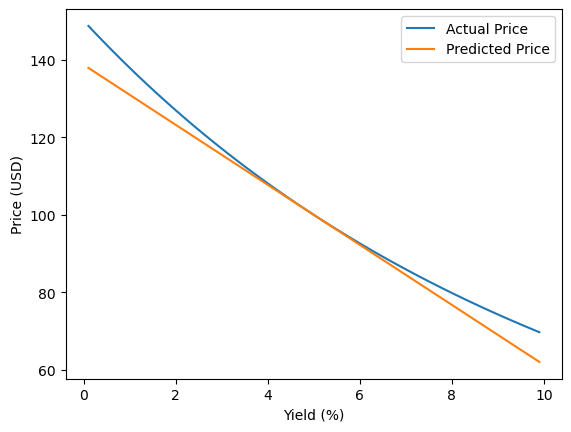

In [98]:
# Plot bond yields against predicted and actual prices, add labels, legend, and display
plt.plot(bond['bond_yield'], bond['price'])
plt.plot(bond['bond_yield'], bond['predicted_price'])
plt.xlabel('Yield (%)')
plt.ylabel('Price (USD)')
plt.legend(["Actual Price", "Predicted Price"])
plt.show()

 **duration is an accurate estimator of bond prices for small changes in yields**

### Finding the convexity of a bond

Find the convexity of a 20 year bond that pays a 6% annual coupon, has a yield to maturity of 5%, and face value of USD 100.

In [102]:
# Find the price of a 20 year bond with 6% coupon and 5% yield
price = -npf.pv(rate=0.05, fv=100, nper=20, pmt=6)

# Find the price of the same bond for a 1% higher and 1% lower level of yields
price_up = -npf.pv(rate=0.06, fv=100, nper=20, pmt=6)
price_down = -npf.pv(rate=0.04, fv=100, nper=20, pmt=6)

# Find the convexity of the bond and print the result
convexity = (price_down+price_up-2*price)/(price*0.01**2)
print("Convexity: ", convexity)

Convexity:  200.6213463156488


## Factors affecting convexity

### Comparing the convexity of two bonds directly for different **coupons**

Find the convexity of two bonds; both will be 5 year bonds with a yield of 3% and face value of USD 100, but the first bond will pay a 1% coupon and the second bond will pay a 10% coupon.

In [106]:
# Find the price of a 5 year bond with 3% yield and 1% coupon
price_1 = -npf.pv(fv=100, nper =5, pmt=1, rate=0.03)

# Shift yields up and down 1% and reprice
price_up_1 = -npf.pv(fv=100, nper =5, pmt=1, rate=0.04)
price_down_1 = -npf.pv(fv=100, nper =5, pmt=1, rate=0.02)

# Find convexity of the bond and print the result
convexity_1 = (price_down_1+price_up_1-2*price_1)/(price_1*0.01**2)
print("Low Coupon Bond Convexity: ", convexity_1)

Low Coupon Bond Convexity:  27.509977561710695


In [107]:
# Find the price of a 5 year bond with 3% yield and 10% coupon
price_2 = -npf.pv(fv=100, nper =5, pmt=10, rate=0.03)

# Shift yields up and down 1% and reprice
price_up_2 = -npf.pv(fv=100, nper =5, pmt=10, rate=0.04)
price_down_2 = -npf.pv(fv=100, nper =5, pmt=10, rate=0.02)

# Find convexity of the bond and print the result
convexity_2 = (price_down_2+price_up_2-2*price_2)/(price_2*0.01**2)
print("High Coupon Bond Convexity: ", convexity_2)

High Coupon Bond Convexity:  22.922469468592325


**the bond with the lower coupon had a higher level of convexity.**

### Using the curvature of the price/yield line for different **maturities**

In [110]:
# Create array of yields and convert to pandas DataFrame
bond_yields = np.arange(0, 20, 0.1)
bond = pd.DataFrame(bond_yields, columns=['bond_yield'])

In [111]:
# Add columns for 5 year and 20 year bonds
bond['price_5y'] = -npf.pv(rate=bond['bond_yield'] / 100, nper=5, pmt=5, fv=100)
bond['price_20y'] = -npf.pv(rate=bond['bond_yield'] / 100, nper=20, pmt=5, fv=100)

D:\Users\sujay\Lib\site-packages\numpy_financial\_financial.py:531: RuntimeWarning: invalid value encountered in divide
  fact = np.where(rate == 0, nper, (1+rate*when)*(temp-1)/rate)
D:\Users\sujay\Lib\site-packages\numpy_financial\_financial.py:531: RuntimeWarning: invalid value encountered in divide
  fact = np.where(rate == 0, nper, (1+rate*when)*(temp-1)/rate)


In [112]:
bond.head()

,bond_yield,price_5y,price_20y
0,0.0,125.000000,200.000000
1,0.1,124.426671,196.978503
2,0.2,123.856669,194.013231
3,0.3,123.289972,191.103034
4,0.4,122.726556,188.246786


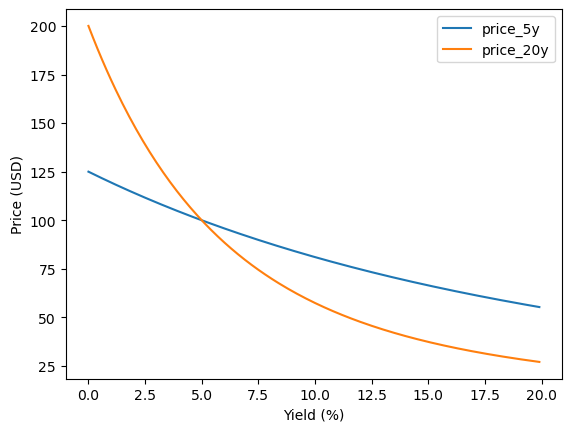

In [113]:
# Create plot for bond bonds, add labels to axes, legend, and display
plt.plot(bond['bond_yield'], bond['price_5y'])
plt.plot(bond['bond_yield'], bond['price_20y'])
plt.xlabel('Yield (%)')
plt.ylabel('Price (USD)')
plt.legend(["price_5y", "price_20y"])
plt.show()

**the bond with the higher maturity shows a much more curved price/yield relationship and therefore has a higher convexity.**

D:\Users\sujay\Lib\site-packages\numpy_financial\_financial.py:531: RuntimeWarning: invalid value encountered in divide
  fact = np.where(rate == 0, nper, (1+rate*when)*(temp-1)/rate)
D:\Users\sujay\Lib\site-packages\numpy_financial\_financial.py:531: RuntimeWarning: invalid value encountered in divide
  fact = np.where(rate == 0, nper, (1+rate*when)*(temp-1)/rate)


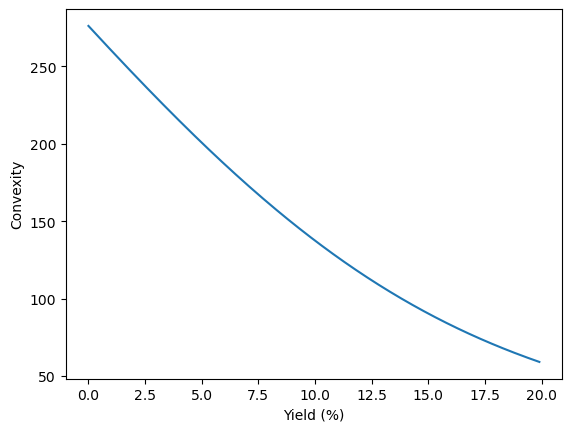

In [115]:
# Create array of bond yields and covert to pandas DataFrame
bond_yields = np.arange(0, 20, 0.1)
bond = pd.DataFrame(bond_yields, columns=['bond_yield'])

# Find price of bond, reprice for higher and lower yields just to calculate convexity
bond['price'] = -npf.pv(rate=bond['bond_yield'] / 100, nper=20, pmt=6, fv=100)
bond['price_up'] = -npf.pv(rate=bond['bond_yield'] / 100 + 0.01, nper=20, pmt=6, fv=100)
bond['price_down'] = -npf.pv(rate=bond['bond_yield'] / 100 - 0.01, nper=20, pmt=6, fv=100)
bond['convexity'] = (bond['price_down'] + bond['price_up'] - 2 * bond['price']) / (bond['price'] * 0.01 ** 2)

# Create plot of bond yields against convexity, add labels to axes, display plot
plt.plot(bond['bond_yield'], bond['convexity'])
plt.xlabel('Yield (%)')
plt.ylabel('Convexity')
plt.show()

**bonds with lower yields have higher convexity**

In [117]:
bond.head()

,bond_yield,price,price_up,price_down,convexity
0,0.0,220.000000,190.227765,255.843089,275.947902
1,0.1,216.770034,187.539230,251.948246,274.364858
2,0.2,213.599321,184.899029,248.126262,272.784068
3,0.3,210.486659,182.306197,244.375636,271.205583
4,0.4,207.430870,179.759787,240.694901,269.629454


### Dollar convexity and bond price prediction

#### Dollar convexity

**Find the dollar convexity of a 10 year bond with a 2% annual coupon and 3% yield and print the result.**

In [121]:
# Find price of a 10 year bond with 2% coupon and 3% yield, shift yields, and reprice
price = -npf.pv(fv=100, nper = 10, pmt = 2, rate = 0.03)
price_up = -npf.pv(fv=100, nper = 10, pmt = 2, rate = 0.04)
price_down = -npf.pv(fv=100, nper = 10, pmt = 2, rate = 0.02)

# Calculate convexity of the bond
convexity = (price_down+price_up-2*price)/(price*0.01**2)

In [122]:
# Calculate dollar convexity and print the result
dollar_convexity = convexity*price*0.01**2
print("Dollar convexity: ", dollar_convexity)

Dollar convexity:  0.8386141148415902


This means that for a 1% change in yields, the dollar duration will change by just under 84 cents

In [124]:
# Find price of 10 year zero coupon bond with a 5% yield, shift yields, and reprice
price = -npf.pv(fv=100, nper=10, pmt=0, rate=0.05)
price_up = -npf.pv(fv=100, nper=10, pmt=0, rate=0.06)
price_down = -npf.pv(fv=100, nper=10, pmt=0, rate=0.04)

# Calculate convexity and dollar convexity of the bond
convexity = (price_down+price_up-2*price)/(price *0.01**2)
dollar_convexity = convexity *price *0.01**2

# Find the convexity adjustment and print the result
convexity_adjustment = 0.5 *dollar_convexity *100**2 *0.01**2
print("Convexity adjustment: ", convexity_adjustment)

Convexity adjustment:  0.3066219329699109


### Combining duration and convexity

Take a 7 year bond that pays an annual coupon of 3% and has a yield to maturity of 4%.

In [127]:
# Find the price of 7 year bond with 3% coupon and 4% yield, shift yields and reprice
price = -npf.pv(fv=100, nper=7, pmt = 3, rate = 0.04)
price_up = -npf.pv(fv=100, nper=7, pmt = 3, rate = 0.05)
price_down = -npf.pv(fv=100, nper=7, pmt = 3, rate = 0.03)

In [128]:
# Find duration and dollar duration of the bond
duration = (price_down - price_up) / (2 * price * 0.01)
dollar_duration = duration * price * 0.01

In [129]:
# Find convexity, dollar convexity and convexity adjustment
convexity = (price_down+price_up-2*price)/(price *0.01**2)
dollar_convexity = convexity *price *0.01**2
convexity_adjustment = 0.5 *dollar_convexity *100**2 *0.01**2

In [130]:
# Combine duration and convexity to predict bond price change
combined_prediction = -100*dollar_duration*0.01 + convexity_adjustment
print("Predicted Price Change: ", combined_prediction)

Predicted Price Change:  -5.5706921248467305


The prediction for bond price changes using both duration and convexity will be significantly more accurate. This is because the convexity adjustment will help capture the curvature of the bond price/yield relationship.